In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from PIL import Image
import numpy as np

In [2]:
eda_uninf_df = pd.read_csv('../this_way/eda_train_uninfect.csv')

In [3]:
eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Uninfected_Edge_Density,Uninfected_MeanBlobSize,Uninfected_MaxBlobSize
0,C100P61ThinF_IMG_20150918_144104_cell_128.png,146.5920,108.2592,102.9936,0.1408,1.0,1.0
1,C100P61ThinF_IMG_20150918_144104_cell_131.png,155.7472,115.0592,110.2320,0.1328,1.0,1.0
2,C100P61ThinF_IMG_20150918_144104_cell_144.png,158.4128,117.5648,112.1712,0.1344,0.0,0.0
3,C100P61ThinF_IMG_20150918_144104_cell_21.png,158.5968,118.3712,114.6064,0.1280,0.0,0.0
4,C100P61ThinF_IMG_20150918_144104_cell_34.png,156.4768,116.3568,113.4704,0.1376,1.0,2.0


In [4]:
eda_uninf_df["target"]= 0 

In [5]:
len(eda_uninf_df)

1750

In [11]:
folder_path_p = "../this_way/clean/train/infected_processed/"

# Initialize an empty list to store the RGB values for each image
image_flat_values_p = []
file_names_p = []

# Loop through the image files and convert each image to an RGB matrix
for image_file_p in os.listdir(folder_path_p):
    if image_file_p.endswith('.png'):
        file_name_without_extension = os.path.splitext(image_file_p)[0]
        # Construct the full path to the image
        img_path_p = os.path.join(folder_path_p, image_file_p)

        # Read the image using OpenCV
        img_p = Image.open(img_path_p)

        image_array_p = np.array(img_p)
        # Flatten the matrix to a 1D array
        flattened_pixels_p = image_array_p.flatten()

        # Append the values to the list
        image_flat_values_p.append(flattened_pixels_p)
        file_names_p.append(file_name_without_extension)

# Create a DataFrame where each row represents an image's pixels' values
inf_df = pd.DataFrame(image_flat_values_p)

inf_df["train_file_names"] = file_names_p  # Display the first few rows of the DataFrame

In [12]:
inf_df["target"]= 1

In [113]:
inf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1867,1868,1869,1870,1871,1872,1873,1874,train_file_names,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C118P79ThinF_IMG_20151002_105018_cell_150,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C189P150ThinF_IMG_20151203_142224_cell_84,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C91P52ThinF_IMG_20150821_123116_cell_189,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C84P45ThinF_IMG_20150818_101226_cell_98,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C144P105ThinF_IMG_20151015_163432_cell_310,1


In [114]:
inf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1867,1868,1869,1870,1871,1872,1873,1874,train_file_names,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C118P79ThinF_IMG_20151002_105018_cell_150,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C189P150ThinF_IMG_20151203_142224_cell_84,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C91P52ThinF_IMG_20150821_123116_cell_189,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C84P45ThinF_IMG_20150818_101226_cell_98,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,C144P105ThinF_IMG_20151015_163432_cell_310,1


In [115]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

image_data =[]
# Define the file path to the image folder
image_folder_p = '/Users/srinivasjayaram1987/Desktop/Data_Analytics/project_4/this_way/Dataset/cell_images/clean/Train/Parasitized/'

# Assuming you have a DataFrame named df
# with columns 'train_file_names' and 'target'

# Define a function to load an image and return its array data
def load_image(image_name):
    # Combine the image folder path and image name with the ".png" extension
    file_path = os.path.join(image_folder_p, image_name + '.png')
    with Image.open(file_path) as img:
        return np.array(img).flatten()

# Apply the load_image function to the 'train_file_names' column
inf_data_train = inf_df['train_file_names'].apply(load_image)
inf_pixel = pd.DataFrame(list(inf_data_train.values))

In [116]:
inf_pixel = inf_pixel/255
inf_pixel['target']= 1

In [117]:
image_data =[]
# Define the file path to the image folder
image_folder_u = '/Users/srinivasjayaram1987/Desktop/Data_Analytics/project_4/this_way/Dataset/cell_images/clean/Train/Uninfected/'

# Define a function to load an image and return its array data
def load_image(image_name):
    # Combine the image folder path and image name with the ".png" extension
    file_path = os.path.join(image_folder_u, image_name + '.png')
    with Image.open(file_path) as img:
        return np.array(img).flatten()

# Apply the load_image function to the 'train_file_names' column
uninf_data_train = uninf_df['train_file_names'].apply(load_image)


In [118]:
uninf_pixel = pd.DataFrame(list(uninf_data_train.values))

In [119]:
uninf_pixel = uninf_pixel/255
uninf_pixel["target"]= 0

In [120]:
train_df = pd.concat([inf_pixel,uninf_pixel],axis = 0)

In [121]:
X = train_df.drop(columns = "target").values
y = train_df['target'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [122]:
X = X.reshape(-1,25,25,3)

In [123]:
X.shape

(27558, 25, 25, 3)

In [124]:
len(y)

27558

In [125]:
# Split the dataset into train, validation, and test sets
from sklearn.model_selection import train_test_split
# Split your data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(25, 25, 3), kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Print a summary of the model
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 23, 23, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 11, 11, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 2, 16)          4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 1, 1, 16)         

In [126]:
# Train the model using the train and validation datasets
history = model.fit(X_train, y_train, validation_data=(X, y), epochs=20, batch_size=32)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)



Epoch 1/20
689/689 [==============================] - 6s 7ms/step - loss: 0.5800 - accuracy: 0.7418 - val_loss: 0.3789 - val_accuracy: 0.8535
Epoch 2/20
689/689 [==============================] - 5s 7ms/step - loss: 0.3090 - accuracy: 0.8934 - val_loss: 0.2495 - val_accuracy: 0.9190
Epoch 3/20
689/689 [==============================] - 5s 7ms/step - loss: 0.2423 - accuracy: 0.9237 - val_loss: 0.2234 - val_accuracy: 0.9290
Epoch 4/20
689/689 [==============================] - 5s 7ms/step - loss: 0.2213 - accuracy: 0.9305 - val_loss: 0.2300 - val_accuracy: 0.9329
Epoch 5/20
689/689 [==============================] - 5s 7ms/step - loss: 0.2037 - accuracy: 0.9383 - val_loss: 0.1854 - val_accuracy: 0.9435
Epoch 6/20
689/689 [==============================] - 5s 7ms/step - loss: 0.1960 - accuracy: 0.9381 - val_loss: 0.2020 - val_accuracy: 0.9333
Epoch 7/20
689/689 [==============================] - 5s 7ms/step - loss: 0.1931 - accuracy: 0.9393 - val_loss: 0.1924 - val_accuracy: 0.9397
Epoch 

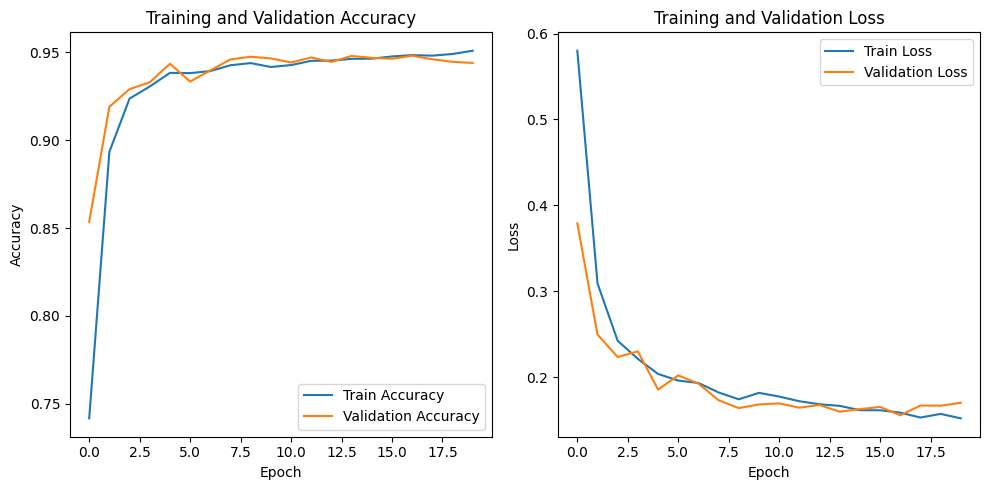

In [127]:
# Visualize the training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [128]:
import cv2

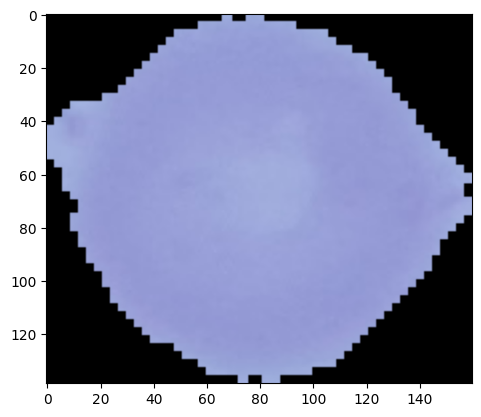

In [129]:
img = cv2.imread('../new_direction/Dataset/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')
plt.imshow(img)
plt.show()

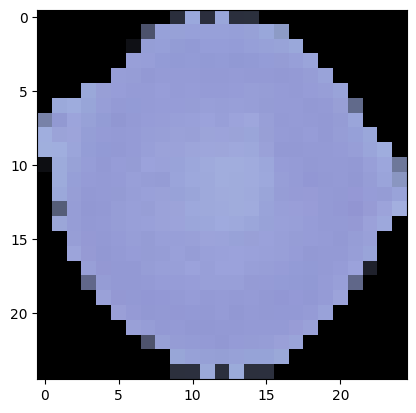

In [130]:
resize = tf.image.resize(img, (25,25))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [131]:
predict_value = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [132]:
predict_value

array([[0.0128965]], dtype=float32)

In [133]:
if predict_value < 0.5: 
    print(f'Predicted class is uninfected')
else:
    print(f'Predicted class is Infected')

Predicted class is uninfected


In [134]:
model.save('CNN_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [135]:
from keras.models import load_model
from keras.preprocessing import image

# Load your trained CNN model
model = load_model('CNN_model.h5')  # Replace with the path to your CNN model

# Function to preprocess an image
def preprocess_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(25, 25))  # Replace with your target image size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values if needed
    return img

# Create an empty list to store predictions
cnn_predictions = []

In [136]:
short_df = uninf_df[:100]

In [137]:
cnn_predictions=[]

In [138]:
# Iterate through the 'image_name' column and make predictions
for image_name in short_df['train_file_names']:
    image_path = image_folder_u + image_name +'.png' # Replace with the actual path
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    cnn_predictions.append(prediction[0][0])  # Assuming the model output is a single value

1/1 [==============================] - 0s 12ms/step


In [139]:
prediction

array([[0.00593145]], dtype=float32)

In [140]:
short_df['CNN_Predictions'] = np.round(cnn_predictions)

/var/folders/qh/th17k7b126bdp6fpt44nzdb80000gn/T/ipykernel_992/1356640035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['CNN_Predictions'] = np.round(cnn_predictions)


In [141]:
short_df

,0,1,2,3,4,5,6,7,8,9,...,1868,1869,1870,1871,1872,1873,1874,train_file_names,target,CNN_Predictions
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C13NThinF_IMG_20150614_131318_cell_179,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C205ThinF_IMG_20151106_152003_cell_21,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C230ThinF_IMG_20151112_150647_cell_1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C134P95ThinF_IMG_20151005_121834_cell_65,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C141P102ThinF_IMG_20151005_214836_cell_132,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C224ThinF_IMG_20151112_112834_cell_109,0,0.0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C167P128ReThinF_IMG_20151201_110011_cell_180,0,0.0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C170P131ThinF_IMG_20151119_120233_cell_168,0,0.0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,C238NThinF_IMG_20151207_114605_cell_163,0,0.0


In [142]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
count_ones = short_df['CNN_Predictions'].astype(str).str.count('1').sum()

print("Number of times '1' appears in 'CNN_Predictions':", count_ones)


Number of times '1' appears in 'CNN_Predictions': 3


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

eda_df = pd.read_csv('eda.csv')[:100]



In [144]:
eda_df

,Uninfected_Edge_Density,Infected_Edge_Density,Parasitized_Avg_Colors,Uninfected_Avg_Colors,Infected_MeanBlobSize,Infected_MaxBlobSize,Uninfected_MeanBlobSize,Uninfected_MaxBlobSize
0,0.1408,0.1744,133.491832,118.653807,5.027778,13.888889,2.074074,7.444444
1,0.1328,0.1696,132.621040,126.433029,5.833333,13.888889,1.585859,7.444444
2,0.1344,0.1680,113.769025,128.820641,4.866667,13.888889,3.148148,13.888889
3,0.1280,0.1840,121.016622,129.876280,3.148148,13.888889,6.370370,17.111111
4,0.1376,0.1696,126.731932,128.073351,2.611111,7.444444,4.222222,13.888889
...,...,...,...,...,...,...,...,...
95,0.1424,0.2640,129.397891,119.069393,4.866667,13.888889,1.585859,7.444444
96,0.1392,0.1744,117.536346,127.255396,1.805556,7.444444,5.027778,17.111111
97,0.1376,0.1536,124.401706,126.821925,1.644444,7.444444,1.805556,7.444444
98,0.2320,0.2096,108.931954,121.221662,3.577778,13.888889,1.920635,7.444444


In [145]:
len(eda_df)

100

In [146]:

# Combine CNN predictions with RF features
eda_df['CNN_Predictions'] = np.round(cnn_predictions)

# Split the dataset into features (X) and the target variable (y)
X = eda_df.drop('target', axis=1).values
y = eda_df['target'].values



KeyError: "['target'] not found in axis"

In [ ]:
eda_df

,Uninfected_Edge_Density,Infected_Edge_Density,Parasitized_Avg_Colors,Uninfected_Avg_Colors,Infected_MeanBlobSize,Infected_MaxBlobSize,Uninfected_MeanBlobSize,Uninfected_MaxBlobSize,CNN_Predictions
0,0.1408,0.1744,133.491832,118.653807,5.027778,13.888889,2.074074,7.444444,0.0
1,0.1328,0.1696,132.621040,126.433029,5.833333,13.888889,1.585859,7.444444,0.0
2,0.1344,0.1680,113.769025,128.820641,4.866667,13.888889,3.148148,13.888889,0.0
3,0.1280,0.1840,121.016622,129.876280,3.148148,13.888889,6.370370,17.111111,0.0
4,0.1376,0.1696,126.731932,128.073351,2.611111,7.444444,4.222222,13.888889,0.0
...,...,...,...,...,...,...,...,...,...
95,0.1424,0.2640,129.397891,119.069393,4.866667,13.888889,1.585859,7.444444,0.0
96,0.1392,0.1744,117.536346,127.255396,1.805556,7.444444,5.027778,17.111111,0.0
97,0.1376,0.1536,124.401706,126.821925,1.644444,7.444444,1.805556,7.444444,0.0
98,0.2320,0.2096,108.931954,121.221662,3.577778,13.888889,1.920635,7.444444,0.0


In [ ]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.09803922, 0.06666667, 0.06666667],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier on the combined features
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the combined model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(report)

ValueError: Found array with dim 4. StandardScaler expected <= 2.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Load the pixel data
pixel_data = pd.read_csv('pixel_data.csv')
tabular_data = pd.read_csv('tabular_data.csv')

# Combine the two datasets based on common column 'train_file_names'
combined_data = pd.merge(pixel_data, tabular_data, on='train_file_names')

# Separate features and target
X_pixel = combined_data.iloc[:, 1:1875].values  # Pixel data
X_tabular = combined_data.iloc[:, -8:].values    # Tabular data
y = combined_data['target'].values

# Split the data into training and testing sets
X_pixel_train, X_pixel_test, X_tabular_train, X_tabular_test, y_train, y_test = train_test_split(
    X_pixel, X_tabular, y, test_size=0.2, random_state=42)

# Define and train the CNN model for pixel data
input_layer = keras.Input(shape=(1874,))  # Adjust input shape based on your data
dense_layer = layers.Dense(128, activation='relu')(input_layer)
output_layer = layers.Dense(1, activation='sigmoid')(dense_layer)
cnn_model = Model(inputs=input_layer, outputs=output_layer)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_pixel_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Define and train the RF model for tabular data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_tabular_train, y_train)

# Make predictions using both models
cnn_predictions = cnn_model.predict(X_pixel_test)
rf_predictions = rf_model.predict(X_tabular_test)

# Combine predictions from both models
ensemble_predictions = (cnn_predictions + rf_predictions) / 2  # You can adjust the combination method

# Convert ensemble predictions to binary values (0 or 1)
ensemble_predictions = np.round(ensemble_predictions)

# Evaluate the ensemble model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, ensemble_predictions)
report = classification_report(y_test, ensemble_predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
